# Diffusion Equation with Imposed Concentration Boundary Condition

Here we are going to solve our usual diffusion equation with the same initital conditions but with an additional boundary conditions.

### Initial Condition 

The inital condition is going to assumed as when i = 1 :

> ### $ c _{i = 1} (t) = 1 $ 

Again we don't need to solve the diffusion equation at i = 0 as it's always equal to 1 at all time intervals. 

### Additional Condition 

When i = n or x = L, we are going to assume c = 0 i.e :

> ### $ c_{i=n}(t) = 0 $

We are going to use both the Explicit and Implicit Method to solve.

# - Solving by Explicit Method :

The easiest method to solve by. 

In [ ]:
# ------ importing required libraries ------- #
import numpy as np
from matplotlib import pyplot as plt

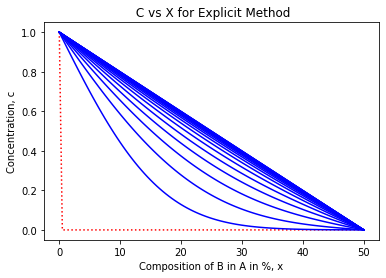

In [ ]:
# ------ defining the parameters ------- #
dt = 0.1
dx = 0.5
D = 1.0
N = 101
alpha = D * dt / dx ** 2

# ------ defining the composition and concentration vectors ------ #
x = np.zeros(N)
for i in range(0, N-1) :
    x[i+1] = x[i] + dx
    
c = np.zeros(N)
c[0] = 1.0 # initial condition
c[100] = 0.0 # imposing the additional condition

plt.plot(x,c, color = "red", linestyle = "dotted") # plotting the initial state

# ------ loops ------ #

for k in range(0,20): # for the number of figures 

    for j in range(0,500): # for the number of timesteps 
        
        for i in range (1, N-1): # actual explicit updation 
            c[i] = c[i] * (1 - 2 * alpha) + alpha * (c[i-1] + c[i+1])
    
    plt.plot(x,c,color = "blue")
    plt.xlabel("Composition of B in A in %, x")
    plt.ylabel ("Concentration, c")
    plt.title (" C vs X for Explicit Method")

So the intital profile is the red line which is in accordance with our imposed boundary conditions. 

Then the composition profile is set up and as time goes by then the steady state is reached where the material comes from the initial point and then it leaves the final point because it has to maintain the composition at x = L, c = 0.

The slope of the curves denote the amount of material that is coming in at any point.

Hence there is a flux at the end point and that is how it is able to maintain the composition at 0 for all times. 

And finally there is a same constant flux everywhere and it becomes a straight line everywhere.

# - Solving By Implicit Method :

Here again because of computation costs we are going to implement the vectorized version of the equation. 

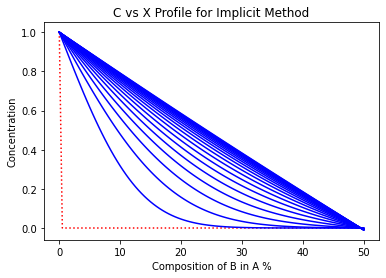

In [ ]:
# ------ Defining the Parameters Involved ------- #
dt = 0.1
dx = 0.5
D = 1.0
alpha = D * dt / dx ** 2
N = 101 

# ----- Concentration and Composition Arrays ----- #

x = np.zeros((N,1)) # for composition
for i in range (0,N-1):
    x[i+1][0] = x[i][0] + dx
    
c = np.zeros((N,1)) # for concentration
c[0][0] = 1.0 # Initial Condition
c[100][0] = 0.0 # Additional Condition

plt.plot(x,c, color = "red", linestyle = "dotted") # initial plot

cold = np.zeros((N,1)) # vector to denote the older time scheme t + delt

cold = c

# ------- Defining the Matrix required ------- #
A = np.zeros((N,N))
A[0][0] = 1.0 # initial condition
A[N-1][N-1] = 0.0 # additional condition

for i in range (1, N-1): # populating the diagonal elements
    A[i][i] = 1 + 2 * alpha

for i in range (1, N): # populating the lower diagonal elements
    A[i][i-1] = -alpha
    
A[N-1,N-2] = -2 * alpha    

for i in range (2, N): # populating the upper diagonal elements
    A[i-1][i] = -alpha

Ainverse = np.linalg.inv(A) # calculating the inverse

# ------- Loops -------- #
for k in range (0,20): 
    
    for j in range (0, 500):
        
        c = np.dot(Ainverse,cold)
        
        for i in range (0, N-1):
            cold[i][0] = c[i][0]
        
    
    plt.plot(x,c, color = "blue")
    plt.xlabel ("Composition of B in A %")
    plt.ylabel ("Concentration")
    plt. title ("C vs X Profile for Implicit Method")

Again the intital profile is shown by red dotted curve and as time goes by the composition profile develops and it reaches a steady state. 

